In [3]:
from keras.models import load_model
model = load_model("paris.h5")
print ("model loaded, hic")


Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 432, got 412
  return f(*args, **kwds)


model loaded, hic


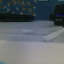

'eiffel'

KeyboardInterrupt: 

In [7]:
import sys
sys.path.insert(0,'/home/pi/zumi/lib')
import EngineV3 as engine
from IPython import display
import picamera, cv2
import numpy as np
import PIL.Image
import time

engine.set_speed(60)
engine.go_forward()

while True:
    with picamera.PiCamera() as camera:
        camera.resolution = (64, 64)

        #collect image from sensor
        camera.capture("hi.jpg")
        img = cv2.imread("hi.jpg")
        img = cv2.flip(img, -1)
        
        #ask NN to predict control from image
        pred = model.predict(img[None, :, :, :])
        
        #get values from pred array
        iArrowDir = np.argmax(pred[0])

        if iArrowDir == 0:
            command = 'up' 
            engine.go_forward()
        elif iArrowDir == 1:
            command = 'left'
            engine.left_a_bit()
            engine.go_forward()
        elif iArrowDir == 2:
            command = 'right' 
            engine.right_a_bit()
            engine.go_forward()
        else:
            command = "eiffel"
            engine.stop()
    
    display.clear_output(wait=True)
    display.display(PIL.Image.fromarray(img))
    display.display(command)
    

In [ ]:
import sys
sys.path.insert(0,'/home/pi/zumi/lib')
import EngineV3 as engine

engine.stop()